In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
url = "https://raw.githubusercontent.com/oribachar13579/oriandyuval/main/1.08_Crash_Data_Report_(detail).csv"
strike_df = pd.read_csv(url)
strike_df.head()

X         Y  OBJECTID  Incidentid                DateTime  Year  \
0 -111.95221  33.42191         1     2598369  2012/01/01 07:25:00+00  2012   
1 -111.93769  33.42319         2     2593420  2012/01/01 11:45:00+00  2012   
2 -111.89196  33.41842         3     2588493  2012/01/01 18:07:00+00  2012   
3 -111.94791  33.41779         4     2584449  2012/01/02 00:03:00+00  2012   
4 -111.92847  33.34956         5     2592211  2012/01/02 00:12:00+00  2012   

      StreetName CrossStreet  Distance                      JunctionRelation  \
0  University Dr    Hardy Dr     0.000          Intersection Non Interchange   
1         7th St  Myrtle Ave   139.920                  Not Junction Related   
2       Price Rd   Orange St     0.000              Intersection Interchange   
3        11th St     Judd St   200.112                  Not Junction Related   
4       Rural Rd   Elliot Rd   135.168  Intersection Related Non Interchange   

   ...  Unittype_Two  Age_Drv2 Gender_Drv2 Traveldirection_Two  \
0  ...        Driver      20.0      Female                East   
1  ...           NaN       NaN         NaN                 NaN   
2  ...        Driver      31.0        Male               South   
3  ...    Driverless       NaN         NaN                East   
4  ...        Driver      20.0      Female               South   

         Unitaction_Two     Violation1_Drv2        AlcoholUse_Drv2  \
0  Going Straight Ahead  No Improper Action  No Apparent Influence   
1                   NaN                 NaN                    NaN   
2  Going Straight Ahead  No Improper Action  No Apparent Influence   
3       Properly Parked                 NaN                    NaN   
4  Going Straight Ahead  No Improper Action  No Apparent Influence   

            DrugUse_Drv2  Latitude  Longitude  
0  No Apparent Influence  33.42191 -111.95221  
1                    NaN  33.42319 -111.93769  
2  No Apparent Influence  33.41842 -111.89196  
3                    NaN  33.41779 -111.94791  
4  No Apparent Influence  33.34956 -111.92847  

[5 rows x 35 columns]

In [6]:
strike_df.shape

(51407, 35)

In [7]:
strike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [8]:
strike_df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
strike_df["Collisionmanner"].unique()


array(['ANGLE (Front To Side)(Other Than Left Turn)', 'Single Vehicle',
       'Left Turn', 'Sideswipe Opposite Direction',
       'Sideswipe Same Direction', 'Other', 'Unknown', 'Rear End',
       'Rear To Side', 'Head On', 'Rear To Rear', '10',
       'Angle - Other Than Left Turn 2', 'U Turn', nan], dtype=object)

In [10]:
len(strike_df)

51407

In [11]:
strike_df["Year"].unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [12]:
strike_df.tail()

X          Y  OBJECTID  Incidentid                DateTime  \
51402 -111.926385  33.435558     51403     4155884  2024/03/14 13:15:00+00   
51403 -111.926404  33.435576     51404     4155885  2024/03/14 13:20:00+00   
51404 -111.909869  33.436621     51405     4155890  2024/03/15 07:11:00+00   
51405 -111.939524  33.386046     51406     4155893  2024/03/09 07:44:00+00   
51406 -111.968688  33.405953     51407     4156010  2024/03/08 19:59:00+00   

       Year             StreetName CrossStreet  Distance  \
51402  2024   SR-202 Exit 7 T-Ramp         NaN       0.0   
51403  2024   SR-202 Exit 7 T-Ramp         NaN       0.0   
51404  2024   SR-202 Exit 8 J-Ramp         NaN       0.0   
51405  2024  US-60 Exit 173 J-Ramp         NaN       0.0   
51406  2024  I-10 Exit 153 C2-Ramp         NaN       0.0   

             JunctionRelation  ...  Unittype_Two  Age_Drv2 Gender_Drv2  \
51402    Not Junction Related  ...        Driver      22.0      Female   
51403  Entrance Exit Ramp 205  ...        Driver      25.0      Female   
51404  Entrance Exit Ramp 205  ...           NaN       NaN         NaN   
51405  Entrance Exit Ramp 205  ...           NaN       NaN         NaN   
51406    Not Junction Related  ...        Driver      58.0        Male   

      Traveldirection_Two         Unitaction_Two     Violation1_Drv2  \
51402                East  Stopped In Trafficway  No Improper Action   
51403                West      Making Right Turn  No Improper Action   
51404                 NaN                    NaN                 NaN   
51405                 NaN                    NaN                 NaN   
51406                West   Going Straight Ahead  No Improper Action   

             AlcoholUse_Drv2           DrugUse_Drv2   Latitude   Longitude  
51402  No Apparent Influence  No Apparent Influence  33.435558 -111.926385  
51403  No Apparent Influence  No Apparent Influence  33.435576 -111.926404  
51404                    NaN                    NaN  33.436621 -111.909869  
51405                    NaN                    NaN  33.386046 -111.939524  
51406  No Apparent Influence  No Apparent Influence  33.405953 -111.968688  

[5 rows x 35 columns]

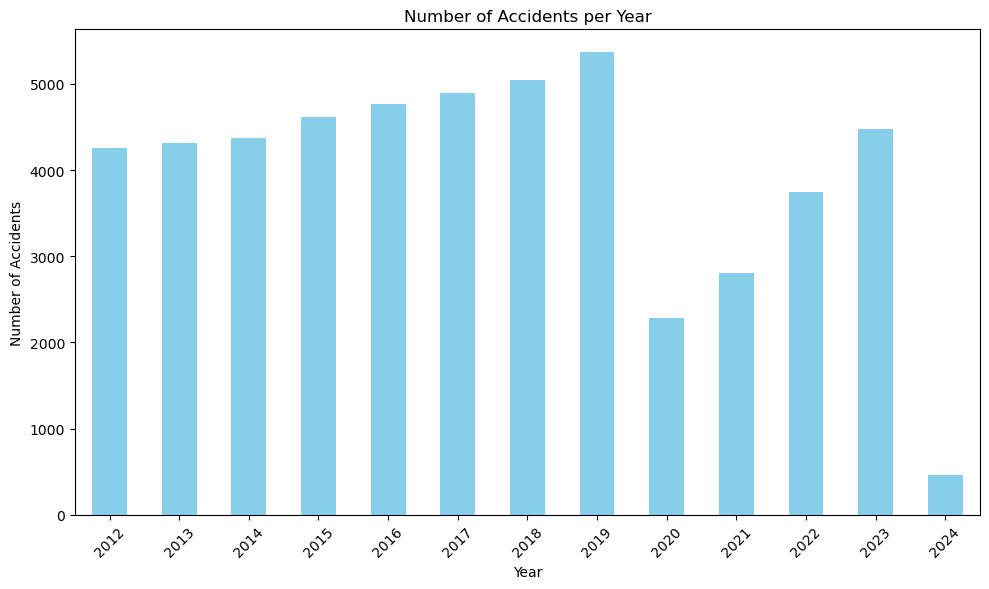

In [13]:
# Plot 1: Number of accidents per year
accidents_by_year = strike_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_per_year.png')


In [14]:
med_df= strike_df.groupby('Year')['OBJECTID'].count()
med_df

Year
2012    4258
2013    4316
2014    4372
2015    4612
2016    4768
2017    4896
2018    5049
2019    5366
2020    2280
2021    2805
2022    3745
2023    4480
2024     460
Name: OBJECTID, dtype: int64

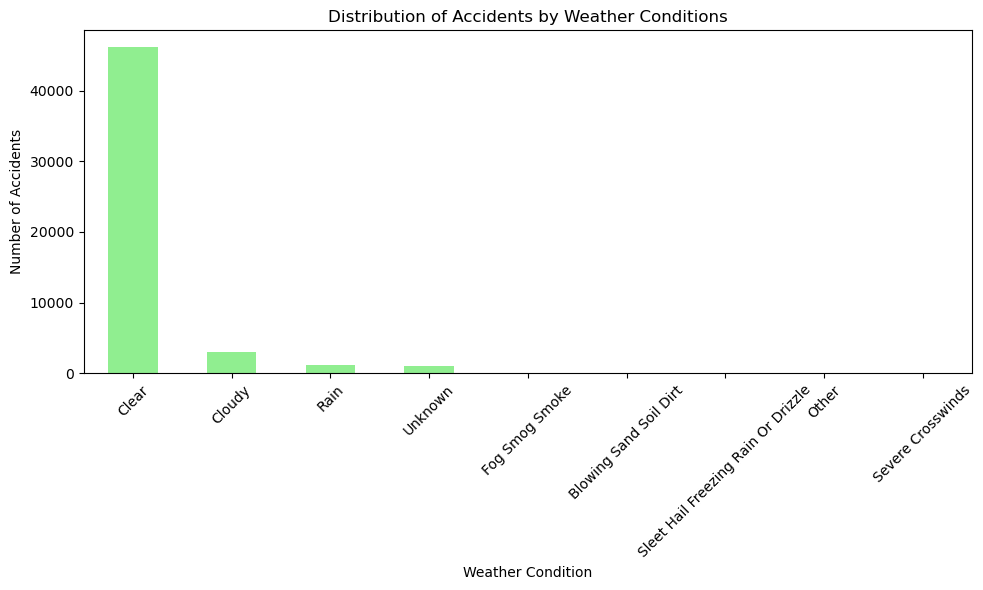

In [15]:
accidents_by_weather = strike_df['Weather'].value_counts()
plt.figure(figsize=(10, 6))
accidents_by_weather.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_by_weather.png')

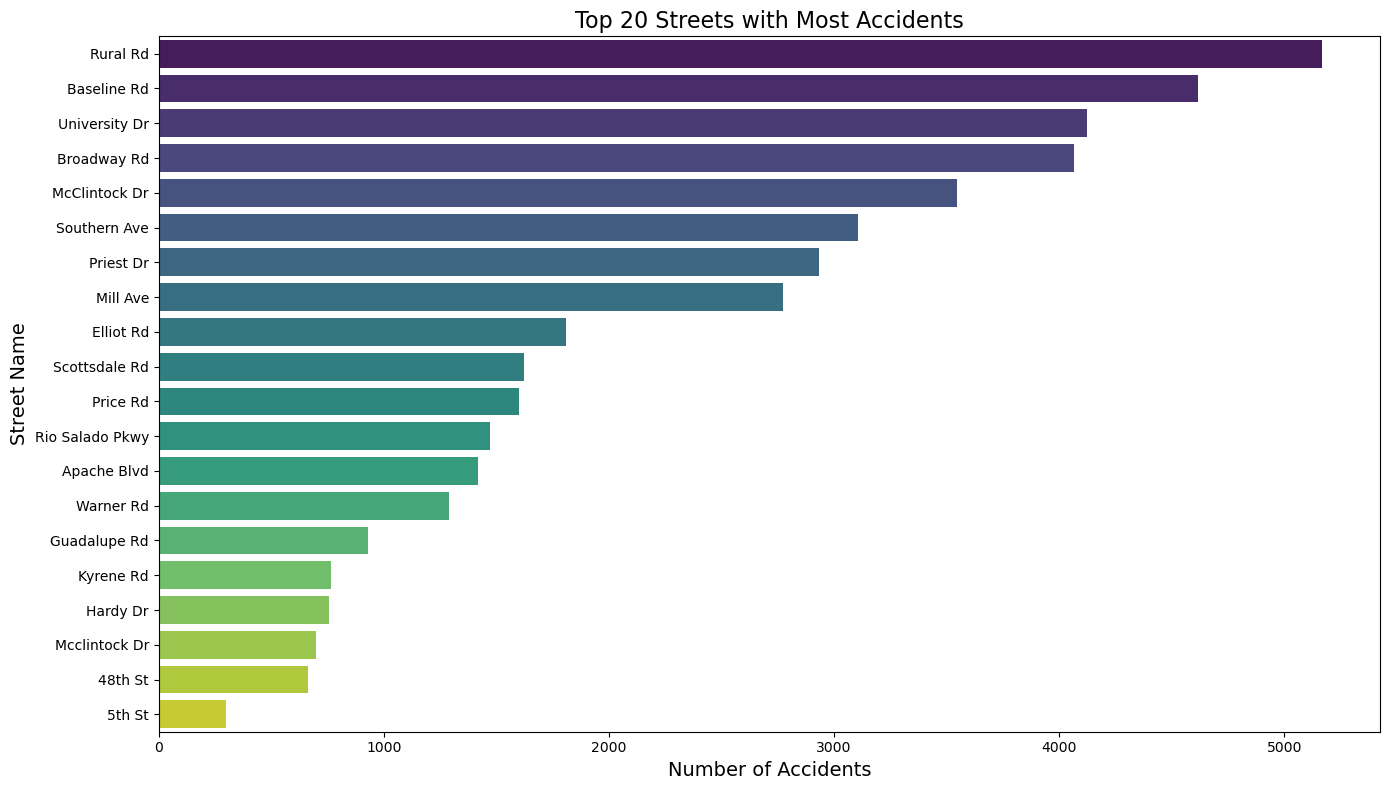

In [16]:
accidents_by_street = strike_df['StreetName'].value_counts().reset_index()
accidents_by_street.columns = ['StreetName', 'Number of Accidents']

# מציגים רק את 20 הרחובות עם מספר התאונות הגבוה ביותר
top_streets = accidents_by_street.head(20)

# יוצרים גרף עמודות שמראה את מספר התאונות ברחובות העליונים
plt.figure(figsize=(14, 8))
sns.barplot(data=top_streets, x='Number of Accidents', y='StreetName', palette='viridis')
plt.title('Top 20 Streets with Most Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Street Name', fontsize=14)
plt.tight_layout()
plt.savefig('top_streets_accidents.png')
plt.show()

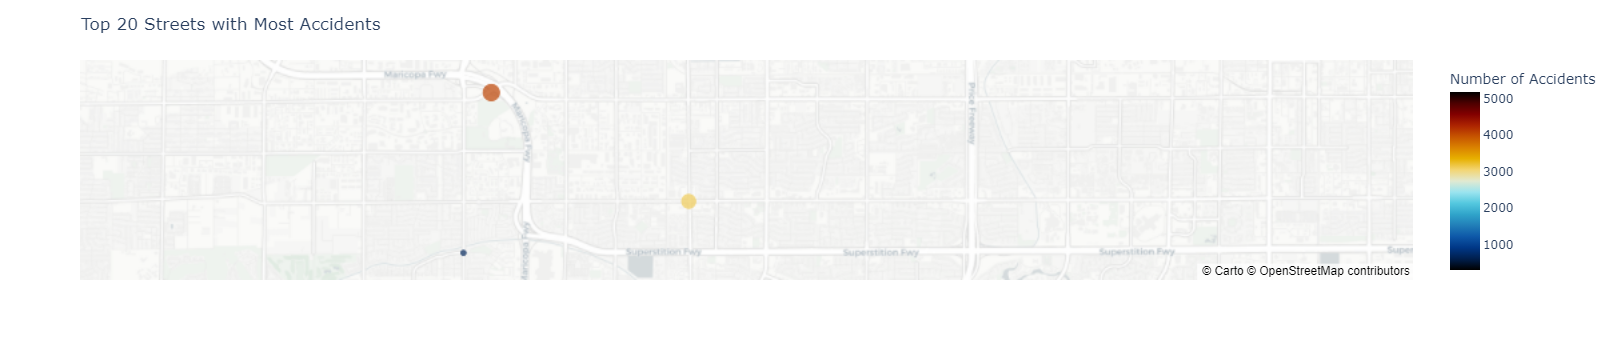

In [17]:

top_streets = accidents_by_street.head(20)

# מאחדים את הנתונים עם קואורדינטות X ו-Y
top_streets_coords = top_streets.merge(strike_df[['StreetName', 'X', 'Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])

# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    top_streets_coords,
    lat='Y',
    lon='X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'X': False, 'Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron'
)

# מציגים את המפה
fig.update_layout(title='Top 20 Streets with Most Accidents')
fig.show()

NameError: name 'df_top_streets' is not defined

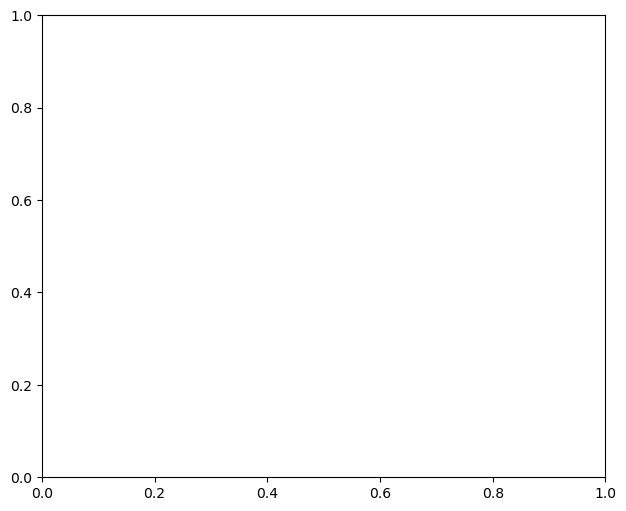

In [18]:
# יצירת גרף פיצ'רים לנהג 1
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender_Drv1', hue='StreetName', data=df_top_streets, palette='viridis')
plt.xlabel('Driver 1 Gender')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 1 Gender and Top 20 Streets')
plt.xticks(rotation=45)
plt.legend(title='Street Name', bbox_to_anchor=(1, 1))

# יצירת גרף פיצ'רים לנהג 2
plt.subplot(1, 2, 2)
sns.countplot(x='Gender_Drv2', hue='StreetName', data=df_top_streets, palette='viridis')
plt.xlabel('Driver 2 Gender')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 2 Gender and Top 20 Streets')
plt.xticks(rotation=45)
plt.legend(title='Street Name', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [19]:
# יצירת DataFrame שמכיל את מספר התאונות לפי כיוון הנסיעה
accidents_by_direction = df_top_streets.groupby('Traveldirection_Two').size().reset_index(name='Number of Accidents')

# מיון לפי מספר התאונות
accidents_by_direction = accidents_by_direction.sort_values(by='Number of Accidents', ascending=False)

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))
plt.bar(accidents_by_direction['Traveldirection_Two'], accidents_by_direction['Number of Accidents'], color='skyblue')
plt.xlabel('Travel Direction')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Travel Direction in Top 20 Streets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df_top_streets' is not defined

C:\Users\User\AppData\Local\Temp\ipykernel_9424\2964158622.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




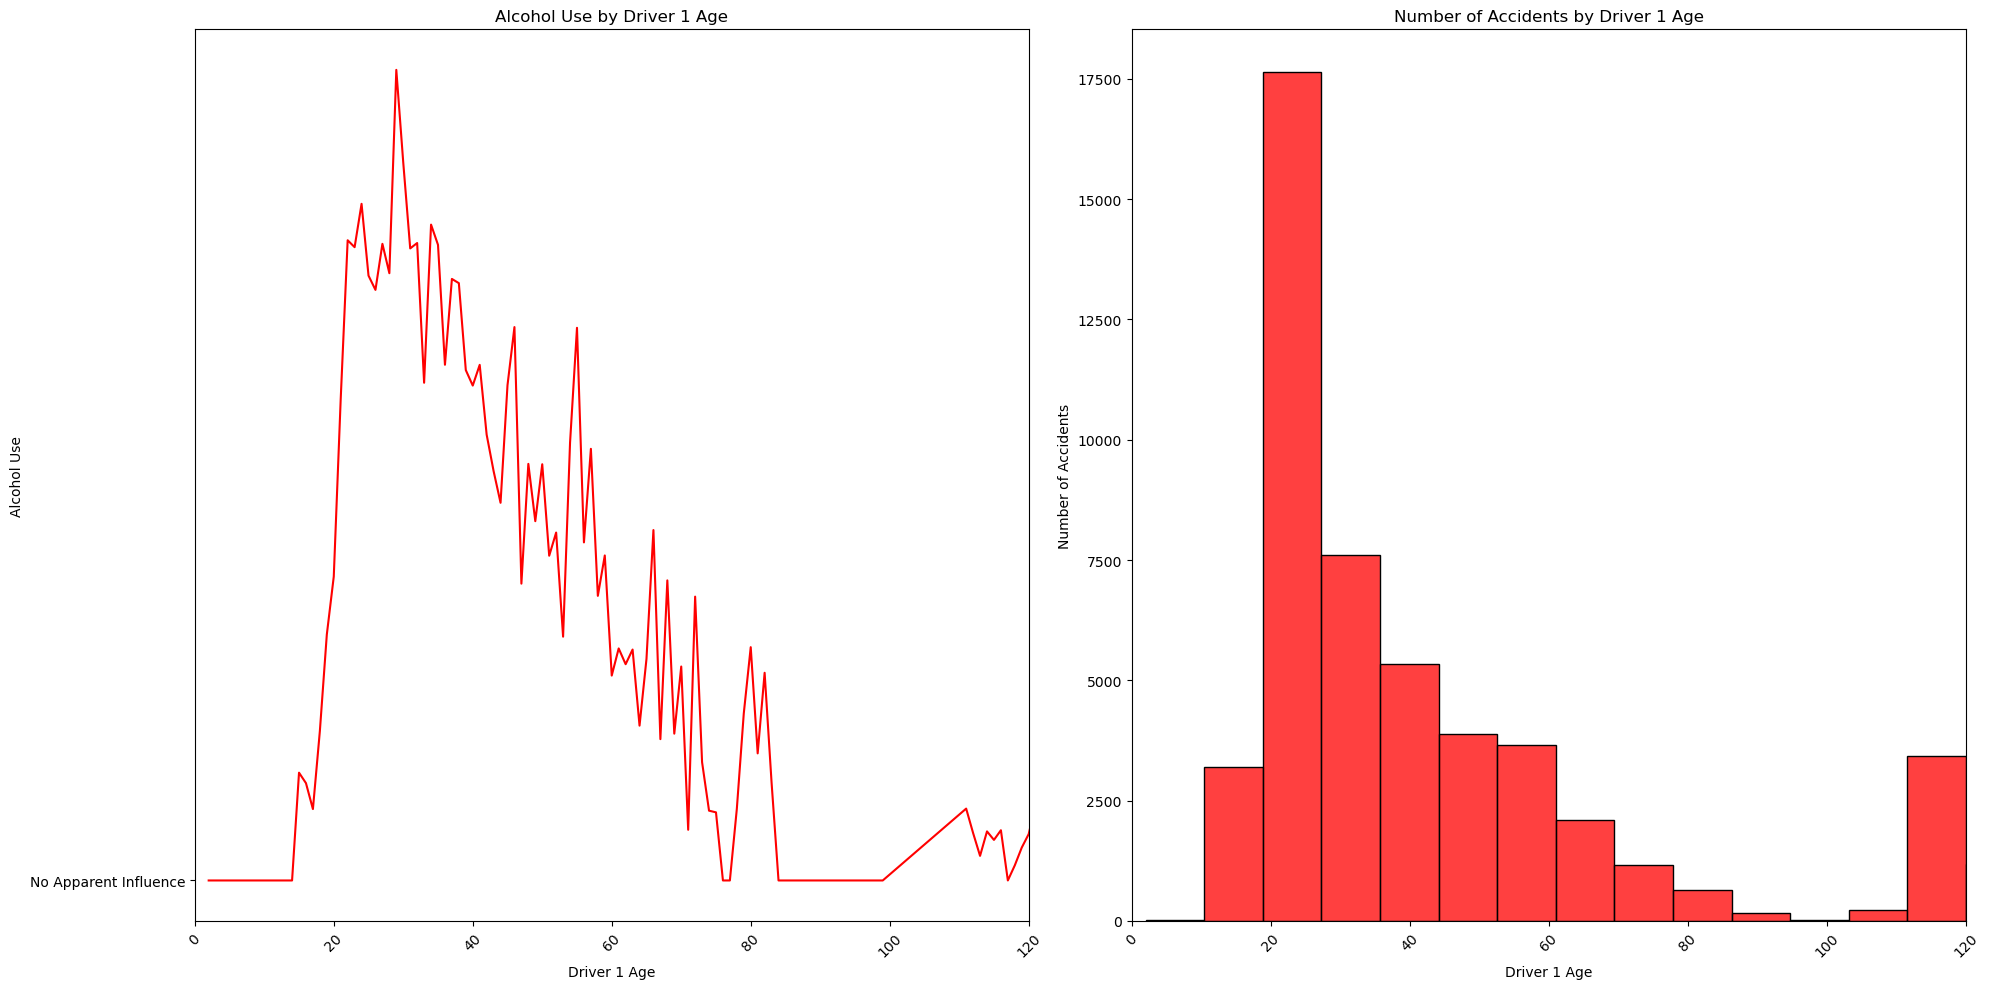

In [20]:
plt.figure(figsize=(20, 10))

# גרף השימוש באלכוהול לפי גיל הנהג
plt.subplot(1, 2, 1)
sns.lineplot(x='Age_Drv1', y='AlcoholUse_Drv1', data=strike_df, ci=None, color='red')
plt.xlabel('Driver 1 Age')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(0, 120)

# גרף מספר התאונות לפי גיל הנהג
plt.subplot(1, 2, 2)
sns.histplot(x='Age_Drv1', data=strike_df, bins=30, color='red')
plt.xlabel('Driver 1 Age')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(0, 120)

plt.tight_layout()
plt.show()


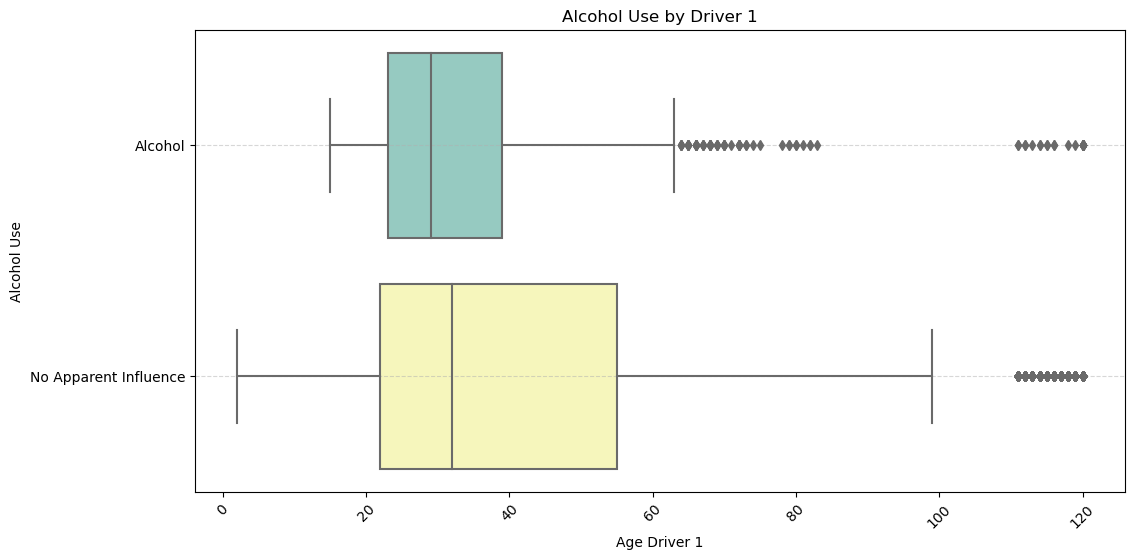

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=strike_df['Age_Drv1'].clip(upper=120), y='AlcoholUse_Drv1', data=strike_df, palette='Set3')
plt.xlabel('Age Driver 1')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use by Driver 1')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


<a id='section2'></a>
## 1. Insight number one

* ניתן לראות כי ישנו קשר הדוק בין השימוש באלכוהול בקרב נהגים צעירים 20-40, אשר משפיע על כמות התאונות המירבית ביותר בקרב הגילאים הללו. אנו משערים כי הקשר הינו חזק ורוב התאונות בגילאים 20-40 מתרחשות בעיקר בגלל השימוש באלכוהול בזמן נהיגה ובנוסף, ניתן לראות כי ישנם המון חריגים אשר בין גיל 60 ל 120 שצורכים אלכוהול וגם שם ניתן לראות מספר נרחב של תאונות


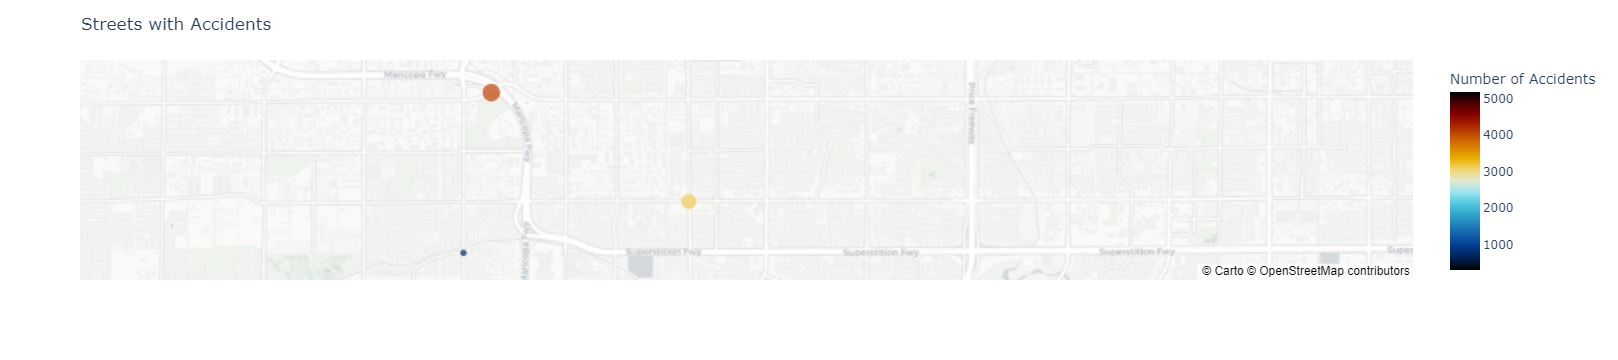

In [22]:
top_streets = accidents_by_street.head(20)

# מאחדים את הנתונים עם קואורדינטות X ו-Y
top_streets_coords = top_streets.merge(strike_df[['StreetName', 'X', 'Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])

# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    top_streets_coords,
    lat='Y',
    lon='X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'X': False, 'Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron'
)

# מציגים את המפה
fig.update_layout(title='Streets with Accidents')
fig.show()

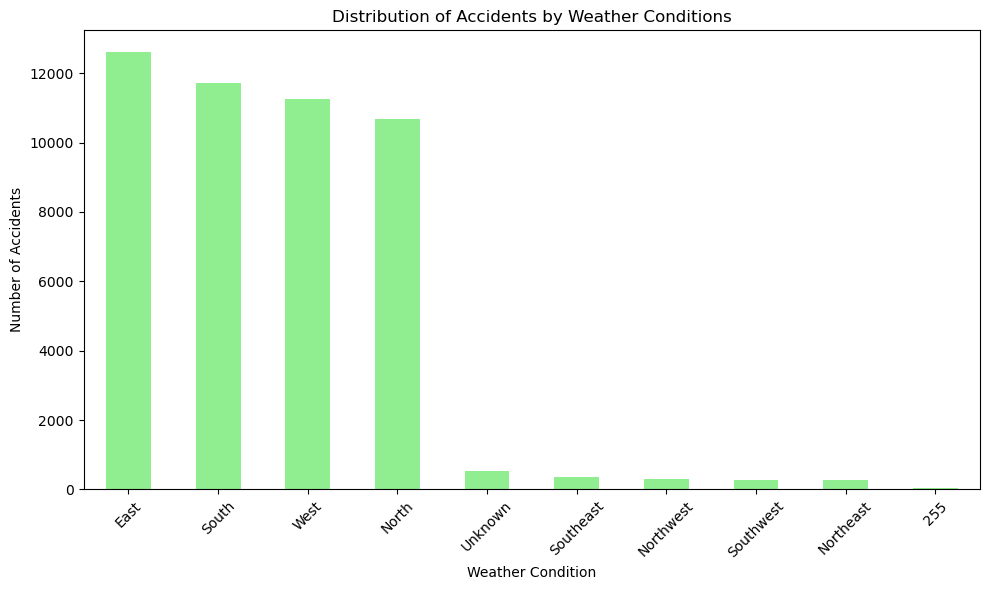

In [31]:
accidents_by_weather = strike_df['Traveldirection_Two'].value_counts()
plt.figure(figsize=(10, 6))
accidents_by_weather.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_by_weather.png')

In [24]:
unique_travel_direction_one = strike_df['Traveldirection_One']
unique_travel_direction_two = strike_df['Traveldirection_Two']

unique_travel_direction_one, unique_travel_direction_two

(0           West
 1           East
 2          South
 3        Unknown
 4          South
           ...   
 51402       East
 51403       East
 51404      North
 51405      South
 51406       West
 Name: Traveldirection_One, Length: 51407, dtype: object,
 0         East
 1          NaN
 2        South
 3         East
 4        South
          ...  
 51402     East
 51403     West
 51404      NaN
 51405      NaN
 51406     West
 Name: Traveldirection_Two, Length: 51407, dtype: object)

In [25]:
# חישוב מספר התאונות לכל רחוב
accidents_by_street = strike_df['StreetName'].value_counts().reset_index()
accidents_by_street.columns = ['StreetName', 'Number of Accidents']

# מאחדים את הנתונים עם קואורדינטות X ו-Y
all_streets_coords = accidents_by_street.merge(stri'StreetName', 'X', 'Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])

# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    all_streets_coords,
    lat='Y',
    lon='X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'X': False, 'Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron'
)

# מציגים את המפה
fig.update_layout(title='Streets with Accidents')
fig.show()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (999539628.py, line 6)

In [26]:
# איסוף הנתונים לכיוון נסיעה אחד
accidents_by_street_direction_one = strike_df.groupby(['StreetName', 'Traveldirection_One']).size().reset_index(name='Number of Accidents One')

# איסוף הנתונים לכיוון נסיעה שני
accidents_by_street_direction_two = strike_df.groupby(['StreetName', 'Traveldirection_Two']).size().reset_index(name='Number of Accidents Two')

# מיזוג הנתונים
accidents_by_street_direction = pd.merge(
    accidents_by_street_direction_one,
    accidents_by_street_direction_two,
    left_on=['StreetName', 'Traveldirection_One'],
    right_on=['StreetName', 'Traveldirection_Two'],
    how='outer'
).fillna(0)

# סידור העמודות
accidents_by_street_direction = accidents_by_street_direction[['StreetName', 'Traveldirection_One', 'Number of Accidents One', 'Traveldirection_Two', 'Number of Accidents Two']]

# הצגת הטבלה
print(accidents_by_street_direction)


          StreetName Traveldirection_One  Number of Accidents One  \
0            10th Pl                East                      5.0   
1            10th Pl           Northeast                      1.0   
2            10th Pl               South                      1.0   
3            10th Pl             Unknown                      3.0   
4            10th Pl                West                      5.0   
...              ...                 ...                      ...   
2198     Westfall Dr                   0                      0.0   
2199    Westshore Dr                   0                      0.0   
2200  Wildermuth Ave                   0                      0.0   
2201         Yale Dr                   0                      0.0   
2202         Yale Dr                   0                      0.0   

     Traveldirection_Two  Number of Accidents Two  
0                   East                      7.0  
1                      0                      0.0  
2              

In [27]:


# איסוף הנתונים לכיוון נסיעה אחד
accidents_by_street_direction_one = strike_df.groupby(['StreetName', 'Traveldirection_One']).size().reset_index(name='Number of Accidents One')

# איסוף הנתונים לכיוון נסיעה שני
accidents_by_street_direction_two = strike_df.groupby(['StreetName', 'Traveldirection_Two']).size().reset_index(name='Number of Accidents Two')

# שינוי שם העמודות עבור חיבור מאוחר יותר
accidents_by_street_direction_one = accidents_by_street_direction_one.rename(columns={'Traveldirection_One': 'TravelDirection'})
accidents_by_street_direction_two = accidents_by_street_direction_two.rename(columns={'Traveldirection_Two': 'TravelDirection'})

# מיזוג הנתונים
combined_accidents = pd.merge(
    accidents_by_street_direction_one,
    accidents_by_street_direction_two,
    on=['StreetName', 'TravelDirection'],
    how='outer'
).fillna(0)

# חישוב סך כל התאונות לכל רחוב ולכל כיוון נסיעה
combined_accidents['Total Accidents'] = combined_accidents['Number of Accidents One'] + combined_accidents['Number of Accidents Two']

# הצגת הטבלה
print(combined_accidents)


          StreetName TravelDirection  Number of Accidents One  \
0            10th Pl            East                      5.0   
1            10th Pl       Northeast                      1.0   
2            10th Pl           South                      1.0   
3            10th Pl         Unknown                      3.0   
4            10th Pl            West                      5.0   
...              ...             ...                      ...   
2198     Westfall Dr         Unknown                      0.0   
2199    Westshore Dr           South                      0.0   
2200  Wildermuth Ave       Northwest                      0.0   
2201         Yale Dr            East                      0.0   
2202         Yale Dr           South                      0.0   

      Number of Accidents Two  Total Accidents  
0                         7.0             12.0  
1                         0.0              1.0  
2                         1.0              2.0  
3                      

AttributeError: 'Text' object has no attribute 'head'

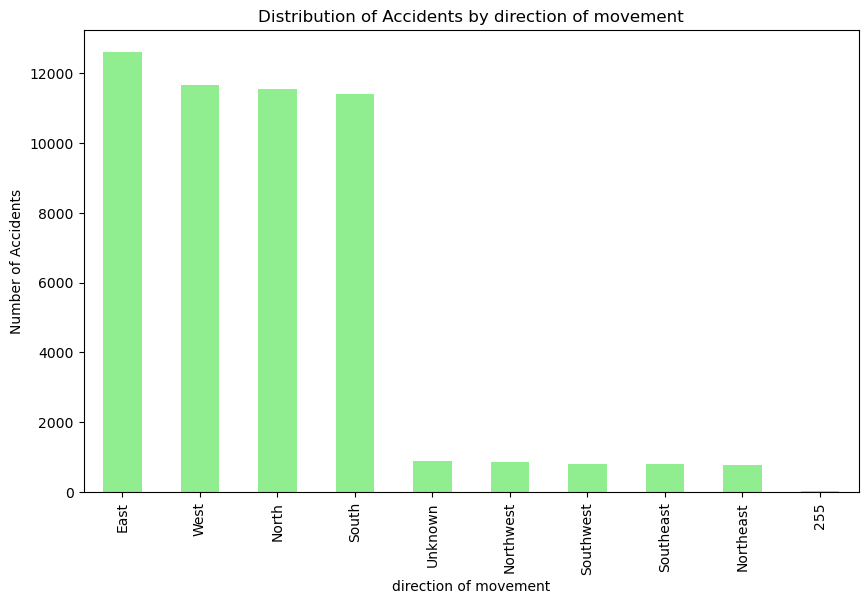

In [81]:
# סופר את מספר התאונות לכל כיוון נסיעה של נהג 1
accident_counts = strike_df['Traveldirection_One'].value_counts()
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by direction of movement')
plt.xlabel('direction of movement')
plt.ylabel('Number of Accidents').head(20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Accidents_by_direction_of_movement.png')


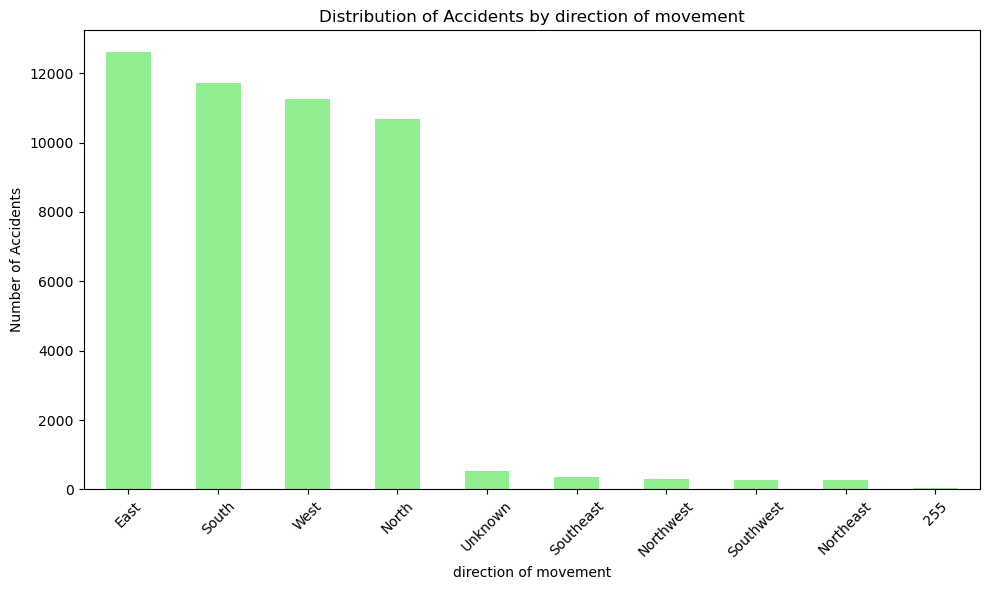

In [36]:
# סופר את מספר התאונות לכל כיוון נסיעה של נהג 1
accident_counts = strike_df['Traveldirection_One'].value_counts()

# ממיר את התוצאה ל-DataFrame לצורך קריאה טובה יותר
accident_counts_df = accident_counts.reset_index()
accident_counts_df.columns = ['TravelDirection_One', 'AccidentCount']

# מדפיס את הטבלה
print(accident_counts_df)


  TravelDirection_One  AccidentCount
0                East          12604
1                West          11669
2               North          11549
3               South          11413
4             Unknown            893
5           Northwest            861
6           Southwest            806
7           Southeast            804
8           Northeast            786
9                 255             21


In [42]:
accident_counts = strike_df['Traveldirection_Two'].value_counts()

# ממיר את התוצאה ל-DataFrame לצורך קריאה טובה יותר
accident_counts_df = accident_counts.reset_index()
accident_counts_df.columns = ['TravelDirection_Two', 'AccidentCount']

# מדפיס את הטבלה
print(accident_counts_df)

  TravelDirection_Two  AccidentCount
0                East          12605
1               South          11706
2                West          11262
3               North          10665
4             Unknown            518
5           Southeast            347
6           Northwest            311
7           Southwest            281
8           Northeast            272
9                 255             53


In [58]:
# סופר את מספר התאונות לכל כיוון נסיעה של נהג"
accident_counts = strike_df['Collisionmanner'].value_counts()

# ממיר את התוצאה ל-DataFrame לצורך קריאה טובה יותר
accident_counts_df = accident_counts.reset_index()
accident_counts_df.columns = ['Collisionmanner', 'AccidentCount']

# מדפיס את הטבלה
print(accident_counts_df)

                                Collisionmanner  AccidentCount
0                                      Rear End          18444
1                                     Left Turn           9466
2                      Sideswipe Same Direction           7050
3   ANGLE (Front To Side)(Other Than Left Turn)           5255
4                Angle - Other Than Left Turn 2           3556
5                                Single Vehicle           3386
6                                         Other           2140
7                                       Unknown            650
8                                       Head On            626
9                  Sideswipe Opposite Direction            407
10                                 Rear To Side            184
11                                       U Turn            154
12                                 Rear To Rear             61
13                                           10             27


In [52]:
# בחירת העמודות הרלוונטיות: סוג התאונה, כיוון הנסיעה, ורחוב
relevant_columns = strike_df[['Collisionmanner', 'Traveldirection_One', 'StreetName']]

# יצירת טבלה המשווה בין סוג התאונה, הכיוון בו התרחשה והרחוב בו התרחשה
comparison_table = relevant_columns.groupby(['Collisionmanner', 'Traveldirection_One', 'StreetName']).size().reset_index(name='AccidentCount')

# הצגת הטבלה
print(comparison_table)


     Collisionmanner Traveldirection_One         StreetName  AccidentCount
0                 10                East        Apache Blvd              1
1                 10                East        Broadway Rd              1
2                 10                East  Calle De Caballos              1
3                 10                East    Rio Salado Pkwy              2
4                 10                East       Southern Ave              1
...              ...                 ...                ...            ...
5375         Unknown                West          Solana Dr              1
5376         Unknown                West       Southern Ave              3
5377         Unknown                West         Terrace Rd              1
5378         Unknown                West      University Dr              7
5379         Unknown                West           Verde Ln              1

[5380 rows x 4 columns]


In [57]:
# בחירת העמודות הרלוונטיות: סוג התאונה ורחוב
relevant_columns = strike_df[['Collisionmanner', 'StreetName']]

# יצירת טבלה המשווה בין סוג התאונה והרחוב בו התרחשה
comparison_table = relevant_columns.groupby(['Collisionmanner', 'StreetName']).size().reset_index(name='AccidentCount')

# מציאת הרחוב עם מספר התאונות הגבוה ביותר עבור כל סוג תאונה
most_common_street_per_collision = comparison_table.loc[comparison_table.groupby('Collisionmanner')['AccidentCount'].idxmax()]

# הצגת הטבלה
print(most_common_street_per_collision)


                                  Collisionmanner       StreetName  \
3                                              10      Baseline Rd   
55    ANGLE (Front To Side)(Other Than Left Turn)      Baseline Rd   
279                Angle - Other Than Left Turn 2      Baseline Rd   
482                                       Head On      Baseline Rd   
755                                     Left Turn         Rural Rd   
1002                                        Other    University Dr   
1244                                     Rear End         Rural Rd   
1332                                 Rear To Rear           6th St   
1373                                 Rear To Side           6th St   
1486                 Sideswipe Opposite Direction      Broadway Rd   
1625                     Sideswipe Same Direction      Baseline Rd   
2091                               Single Vehicle  Rio Salado Pkwy   
2210                                       U Turn         Rural Rd   
2253                

In [ ]:
'Totalinjuries' = int(Totalinjuries)
'Totalfatalities' = int(Totalfatalities)
Total = 

relevant_columns = strike_df[['Totalfatalities', 'StreetName']]

# יצירת טבלה המשווה בין סוג התאונה והרחוב בו התרחשה
comparison_table = relevant_columns.groupby(['Collisionmanner', 'StreetName']).size().reset_index(name='AccidentCount')

# מציאת הרחוב עם מספר התאונות הגבוה ביותר עבור כל סוג תאונה
most_common_street_per_collision = comparison_table.loc[comparison_table.groupby('Collisionmanner')['AccidentCount'].idxmax()]

# הצגת הטבלה
print(most_common_street_per_collision)






Totalinjuries
Totalfatalities

In [64]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# בדיקת סוגי העמודות לאחר ההמרה
print(strike_df[['Totalinjuries', 'Totalfatalities']].dtypes)


Totalinjuries      int32
Totalfatalities    int32
dtype: object


In [65]:
relevant_columns = strike_df[['Totalinjuries' + 'Totalfatalities', 'StreetName']]

# יצירת טבלה המשווה בין סוג התאונה והרחוב בו התרחשה
comparison_table = relevant_columns.groupby(['Totalinjuries' + 'Totalfatalities', 'StreetName']).size().reset_index(name='AccidentCount')

# מציאת הרחוב עם מספר התאונות הגבוה ביותר עבור כל סוג תאונה
most_common_street_per_collision = comparison_table.loc[comparison_table.groupby('Totalinjuries' + 'Totalfatalities')['AccidentCount'].idxmax()]

# הצגת הטבלה
print(most_common_street_per_collision)


KeyError: "['TotalinjuriesTotalfatalities'] not in index"

In [71]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סכימת הפציעות והתאונות הקטלניות לפי רחוב
summed_data = strike_df.groupby('StreetName')[['Totalinjuries', 'Totalfatalities']].sum().reset_index()

# הצגת הטבלה עם שם הרחוב ותוצאת הסכימה
print(summed_data)


         StreetName  Totalinjuries  Totalfatalities
0           10th Pl              3                1
1           10th St              7                0
2           11th St              3                0
3           12th Pl              4                0
4           12th St              3                0
..              ...            ...              ...
517  Wildermuth Ave              5                0
518     Williams St              1                0
519       Willow Dr              1                0
520       Wilson St              3                0
521         Yale Dr              3                0

[522 rows x 3 columns]


In [75]:
summed_data.max()

StreetName         Yale Dr
Totalinjuries         2267
Totalfatalities         20
dtype: object

In [77]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סכימת הפציעות והתאונות הקטלניות לפי רחוב
summed_data = strike_df.groupby('StreetName')[['Totalinjuries', 'Totalfatalities']].sum().reset_index()

# מציאת הרחוב עם מספר ההרוגים הגבוה ביותר
max_fatalities_street = summed_data.loc[summed_data['Totalfatalities'].idxmax()]

# מציאת הרחוב עם מספר הפצועים הגבוה ביותר
max_injuries_street = summed_data.loc[summed_data['Totalinjuries'].idxmax()]

# הצגת התוצאות
print("הרחוב עם הכי הרבה הרוגים:")
print(max_fatalities_street)

print("\nהרחוב עם הכי הרבה פצועים:")
print(max_injuries_street)


הרחוב עם הכי הרבה הרוגים:
StreetName         Baseline Rd
Totalinjuries             2133
Totalfatalities             20
Name: 61, dtype: object

הרחוב עם הכי הרבה פצועים:
StreetName         Rural Rd
Totalinjuries          2267
Totalfatalities           9
Name: 380, dtype: object


In [78]:

# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סכימת התאונות הקטלניות לפי רחוב
summed_fatalities = strike_df.groupby('StreetName')['Totalfatalities'].sum().reset_index()

# סידור הטבלה לפי מספר ההרוגים בסדר יורד
summed_fatalities = summed_fatalities.sort_values(by='Totalfatalities', ascending=False).reset_index(drop=True)

# הצגת הטבלה
print(summed_fatalities)


        StreetName  Totalfatalities
0      Baseline Rd               20
1     Southern Ave               19
2      Broadway Rd               16
3    University Dr               13
4        Priest Dr               11
..             ...              ...
517       Frost Dr                0
518    Frontage Rd                0
519     Fremont Dr                0
520    Fremont Ave                0
521        Yale Dr                0

[522 rows x 2 columns]


In [84]:

# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סכימת התאונות הקטלניות לפי רחוב
summed_injuries = strike_df.groupby('StreetName')['Totalinjuries'].sum().reset_index()

# מציאת סיבת ההרג הכי גבוהה בכל רחוב
def most_common_collision_manner(group):
    return group['Collisionmanner'].value_counts().idxmax()

# הוספת עמודה עם סיבת ההרג הכי גבוהה
collision_manner_by_street = strike_df.groupby('StreetName').apply(most_common_collision_manner).reset_index()
collision_manner_by_street.columns = ['StreetName', 'MostCommonCollisionmanner']

# מיזוג הטבלאות
summed_injuries = pd.merge(summed_fatalities, collision_manner_by_street, on='StreetName')

# סידור הטבלה לפי מספר ההרוגים בסדר יורד
summed_injuries = summed_fatalities.sort_values(by='Totalinjuries', ascending=False).reset_index(drop=True)

# הצגת הטבלה
print(summed_injuries)

KeyError: 'Totalinjuries'

In [83]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סכימת התאונות הקטלניות לפי רחוב
summed_fatalities = strike_df.groupby('StreetName')['Totalfatalities'].sum().reset_index()

# מציאת סיבת ההרג הכי גבוהה בכל רחוב
def most_common_collision_manner(group):
    return group['Collisionmanner'].value_counts().idxmax()

# הוספת עמודה עם סיבת ההרג הכי גבוהה
collision_manner_by_street = strike_df.groupby('StreetName').apply(most_common_collision_manner).reset_index()
collision_manner_by_street.columns = ['StreetName', 'MostCommonCollisionmanner']

# מיזוג הטבלאות
summed_fatalities = pd.merge(summed_fatalities, collision_manner_by_street, on='StreetName')

# סידור הטבלה לפי מספר ההרוגים בסדר יורד
summed_fatalities = summed_fatalities.sort_values(by='Totalfatalities', ascending=False).reset_index(drop=True)

# הצגת הטבלה
print(summed_fatalities)


        StreetName  Totalfatalities  \
0      Baseline Rd               20   
1     Southern Ave               19   
2      Broadway Rd               16   
3    University Dr               13   
4        Priest Dr               11   
..             ...              ...   
517       Frost Dr                0   
518    Frontage Rd                0   
519     Fremont Dr                0   
520    Fremont Ave                0   
521        Yale Dr                0   

                       MostCommonCollisionmanner  
0                                       Rear End  
1                                       Rear End  
2                                       Rear End  
3                                       Rear End  
4                                       Rear End  
..                                           ...  
517               Angle - Other Than Left Turn 2  
518  ANGLE (Front To Side)(Other Than Left Turn)  
519  ANGLE (Front To Side)(Other Than Left Turn)  
520                  

In [107]:
filtered_strike_df = strike_df[(strike_df['Age_Drv1'] >= 18) & (strike_df['Age_Drv1'] <= 90)]

# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)
#strike_df['Age_Drv1'] = pd.to_numeric(strike_df['Age_Drv1'], errors='coerce').fillna(0).astype(int)



# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary = strike_df.groupby('Age_Drv1').agg(
    NumberOfAccidents=pd.NamedAgg(column='Collisionmanner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='Collisionmanner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# הצגת הטבלה
print(driver1_summary)



     Age_Drv1  NumberOfAccidents  TotalFatalities  \
0           0                 47                0   
1           2                  1                0   
2           4                  1                0   
3           5                  1                0   
4           7                  2                0   
..        ...                ...              ...   
107       121                555                1   
108       122                602                2   
109       123                 31                0   
110       254                  4                0   
111       255               1038                1   

                       MostCommonCollisionManner  
0                                 Single Vehicle  
1    ANGLE (Front To Side)(Other Than Left Turn)  
2    ANGLE (Front To Side)(Other Than Left Turn)  
3                                          Other  
4                                          Other  
..                                           ...  
107   

In [ ]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
crash_data['Totalinjuries'] = pd.to_numeric(crash_data['Totalinjuries'], errors='coerce').fillna(0).astype(int)
crash_data['Totalfatalities'] = pd.to_numeric(crash_data['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סינון הנתונים עבור נהגים בגילאים בין 18 ל-90
filtered_crash_data = crash_data[(crash_data['Driverage_One'] >= 18) & (crash_data['Driverage_One'] <= 90)]

# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary_filtered = filtered_crash_data.groupby('Driverage_One').agg(
    NumberOfAccidents=pd.NamedAgg(column='CollisionManner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='CollisionManner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# הצגת הטבלה
print(driver1_summary_filtered)


In [96]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary = strike_df.groupby('Age_Drv1').agg(
    NumberOfAccidents=pd.NamedAgg(column='Collisionmanner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='Collisionmanner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# הצגת הטבלה
print(driver1_summary)


     Age_Drv2  NumberOfAccidents  TotalFatalities  \
0         2.0                  1                0   
1         4.0                  1                0   
2         5.0                  1                0   
3         6.0                  2                0   
4         7.0                  2                0   
..        ...                ...              ...   
102     120.0                 38                1   
103     121.0                 86                2   
104     122.0                 78                5   
105     254.0                  2                0   
106     255.0                164                0   

                       MostCommonCollisionManner  
0                                      Left Turn  
1                                          Other  
2    ANGLE (Front To Side)(Other Than Left Turn)  
3                                        Head On  
4                                      Left Turn  
..                                           ...  
102   

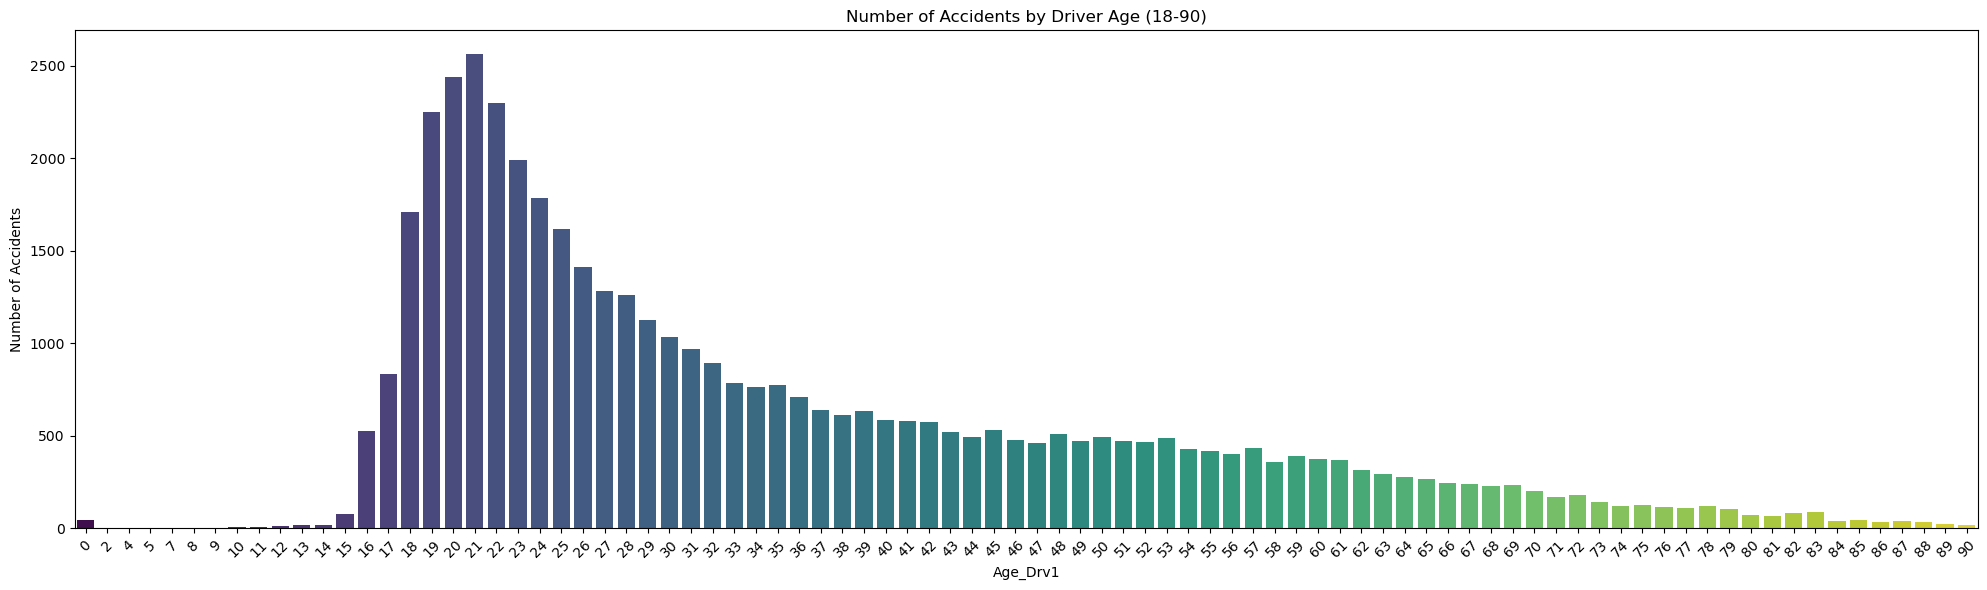

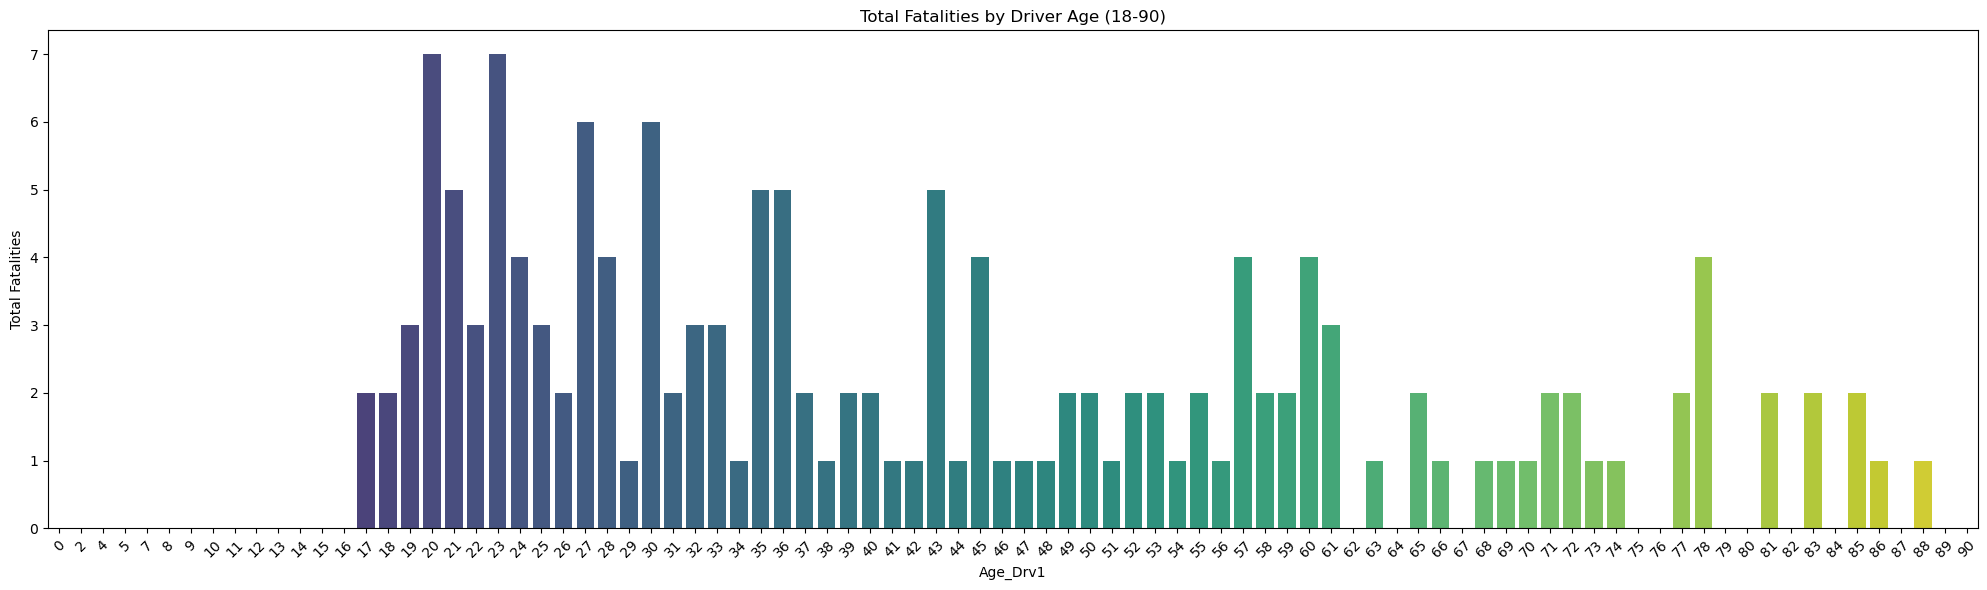

In [128]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סינון הנתונים עבור נהגים בגילאים בין 18 ל-90
filtered_strike_df = strike_df[(strike_df['Age_Drv1'] >= 0) & (strike_df['Age_Drv1'] <= 90)]

# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary_filtered = filtered_strike_df.groupby('Age_Drv1').agg(
    NumberOfAccidents=pd.NamedAgg(column='Collisionmanner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='Collisionmanner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# יצירת גרף barplot עבור מספר התאונות
plt.figure(figsize=(20,6))
sns.barplot(x='Age_Drv1', y='NumberOfAccidents', data=driver1_summary_filtered, palette='viridis')
plt.title('Number of Accidents by Driver Age (18-90)')
plt.xlabel('Age_Drv1')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# יצירת גרף barplot עבור מספר ההרוגים
plt.figure(figsize=(20,6))
sns.barplot(x='Age_Drv1', y='TotalFatalities', data=driver1_summary_filtered, palette='viridis')
plt.title('Total Fatalities by Driver Age (18-90)')
plt.xlabel('Age_Drv1')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


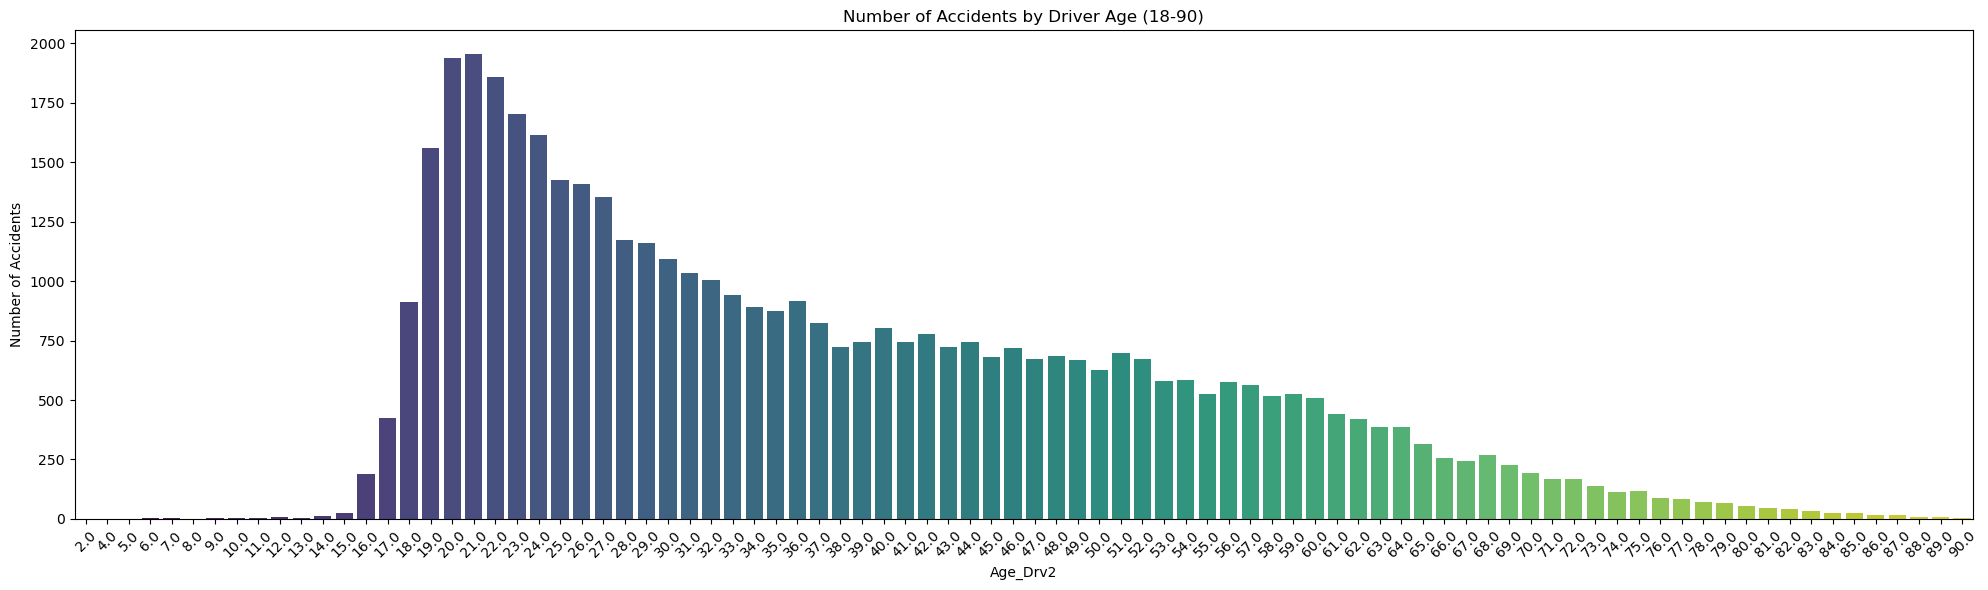

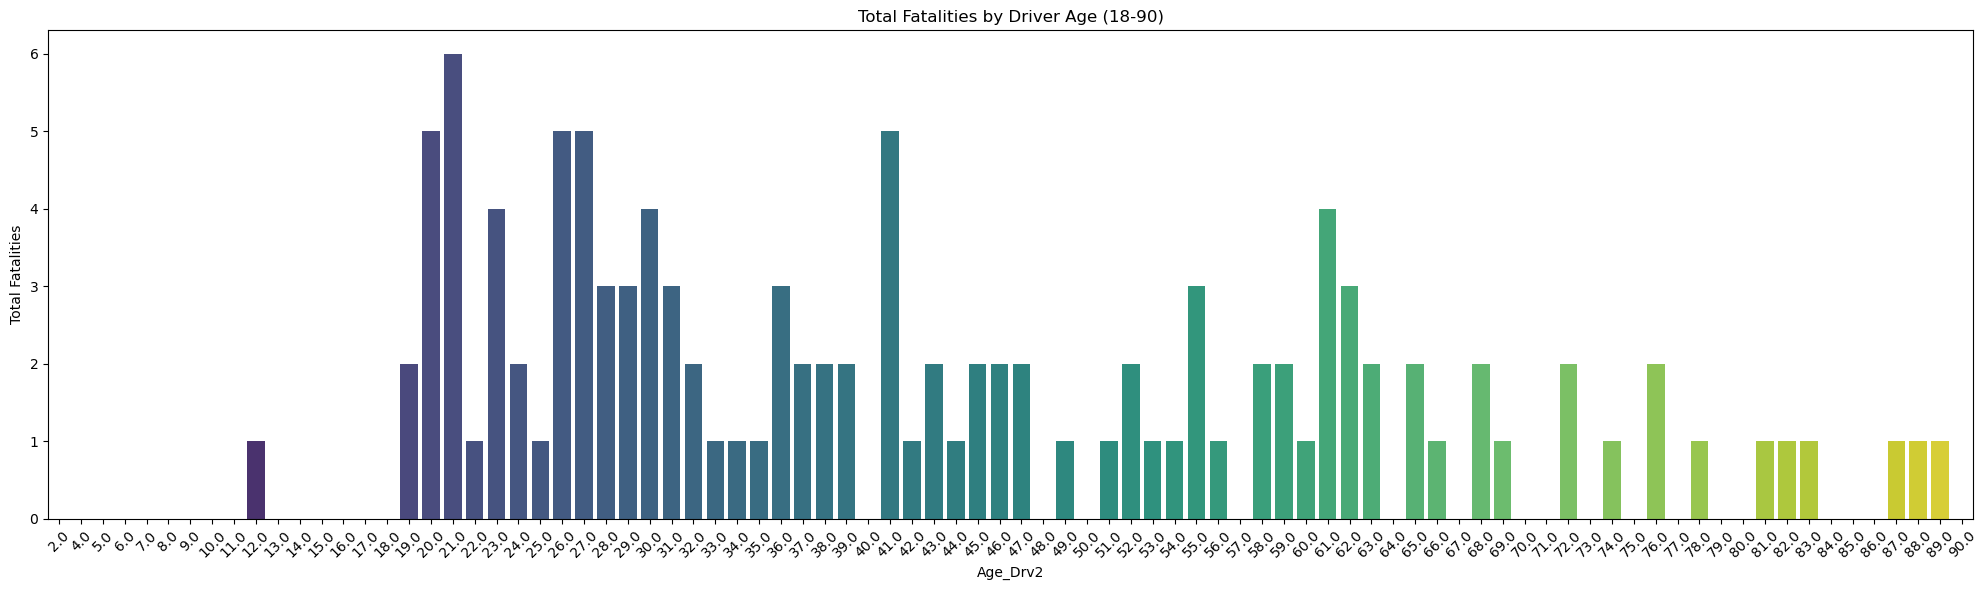

In [132]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סינון הנתונים עבור נהגים בגילאים בין 18 ל-90
filtered_strike_df = strike_df[(strike_df['Age_Drv2'] >= 0) & (strike_df['Age_Drv2'] <= 90)]

# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary_filtered = filtered_strike_df.groupby('Age_Drv2').agg(
    NumberOfAccidents=pd.NamedAgg(column='Collisionmanner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='Collisionmanner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# יצירת גרף barplot עבור מספר התאונות
plt.figure(figsize=(20,6))
sns.barplot(x='Age_Drv2', y='NumberOfAccidents', data=driver1_summary_filtered, palette='viridis')
plt.title('Number of Accidents by Driver Age (18-90)')
plt.xlabel('Age_Drv2')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# יצירת גרף barplot עבור מספר ההרוגים
plt.figure(figsize=(20,6))
sns.barplot(x='Age_Drv2', y='TotalFatalities', data=driver1_summary_filtered, palette='viridis')
plt.title('Total Fatalities by Driver Age (18-90)')
plt.xlabel('Age_Drv2')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [131]:
#יוצא 2 גרפים אחד ליד השני בגלל הרבה נתונים לא יוצא יפה, מעלה את שניהם אחרי זה נחליט 

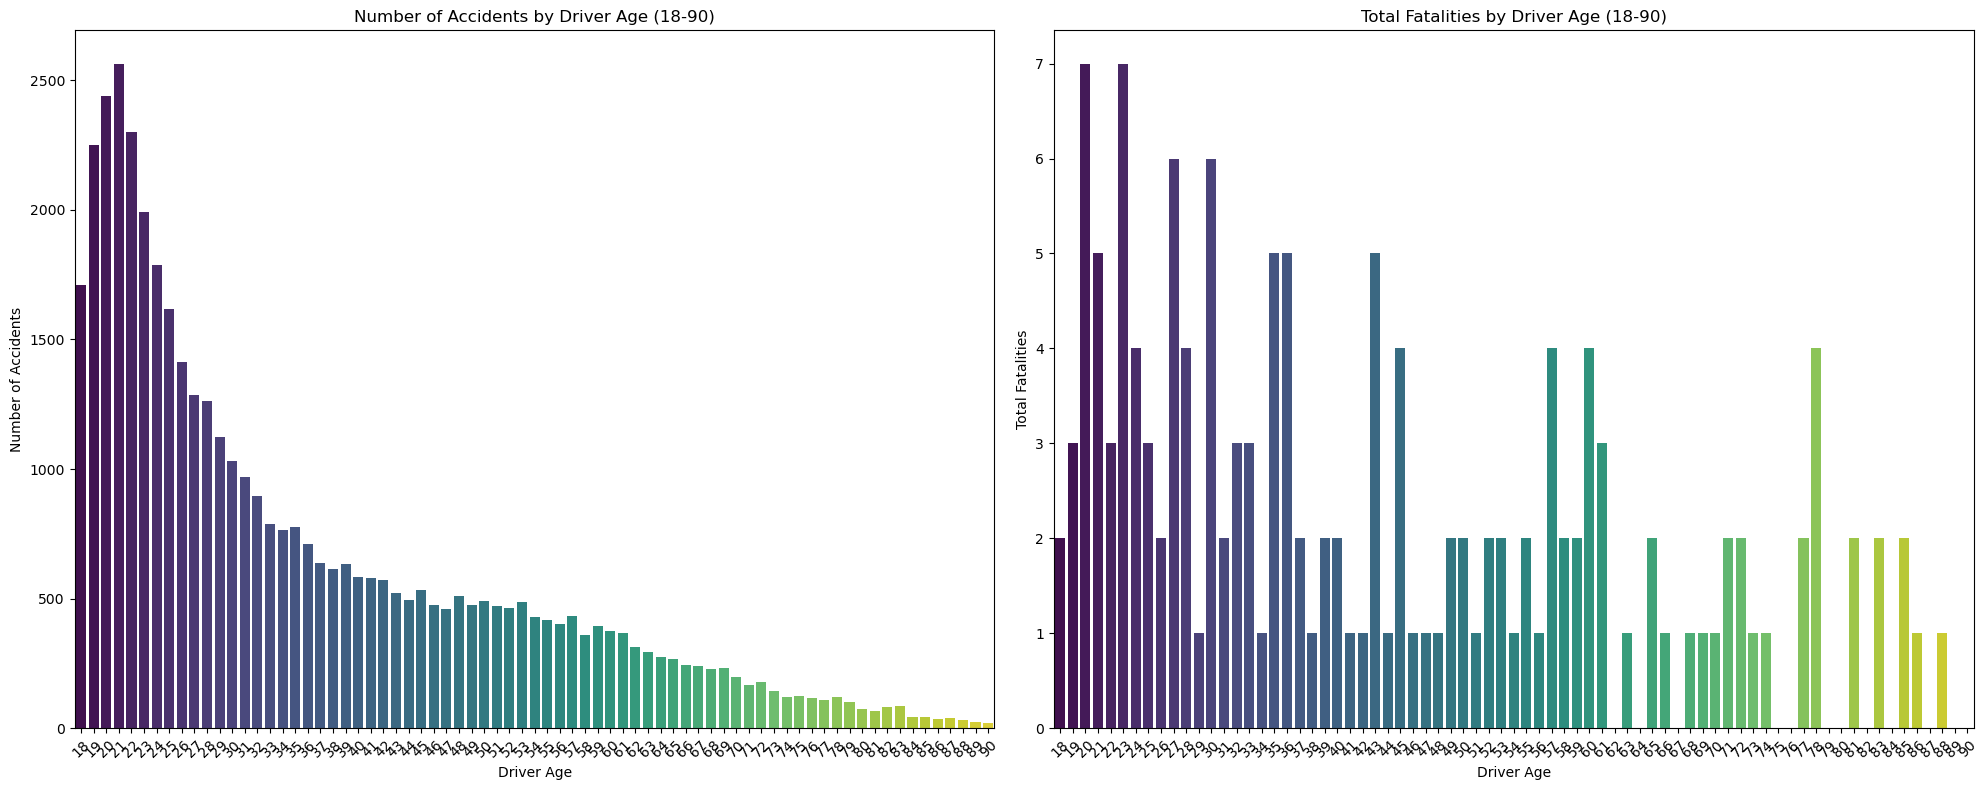

In [130]:
# המרה של העמודות 'Totalinjuries' ו-'Totalfatalities' לסוג int
strike_df['Totalinjuries'] = pd.to_numeric(strike_df['Totalinjuries'], errors='coerce').fillna(0).astype(int)
strike_df['Totalfatalities'] = pd.to_numeric(strike_df['Totalfatalities'], errors='coerce').fillna(0).astype(int)

# סינון הנתונים עבור נהגים בגילאים בין 18 ל-90
filtered_strike_df = strike_df[(strike_df['Age_Drv1'] >= 18) & (strike_df['Age_Drv1'] <= 90)]

# יצירת טבלה מסוכמת לפי גיל נהג 1
driver1_summary_filtered = filtered_strike_df.groupby('Age_Drv1').agg(
    NumberOfAccidents=pd.NamedAgg(column='Collisionmanner', aggfunc='count'),
    TotalFatalities=pd.NamedAgg(column='Totalfatalities', aggfunc='sum'),
    MostCommonCollisionManner=pd.NamedAgg(column='Collisionmanner', aggfunc=lambda x: x.value_counts().idxmax())
).reset_index()

# יצירת גרפים מסוג barplot עבור מספר התאונות ומספר ההרוגים
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# גרף מספר התאונות
sns.barplot(ax=axes[0], x='Age_Drv1', y='NumberOfAccidents', data=driver1_summary_filtered, palette='viridis')
axes[0].set_title('Number of Accidents by Driver Age (18-90)')
axes[0].set_xlabel('Driver Age')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# גרף מספר ההרוגים
sns.barplot(ax=axes[1], x='Age_Drv1', y='TotalFatalities', data=driver1_summary_filtered, palette='viridis')
axes[1].set_title('Total Fatalities by Driver Age (18-90)')
axes[1].set_xlabel('Driver Age')
axes[1].set_ylabel('Total Fatalities')
axes[1].tick_params(axis='x', rotation=45)

# התאמת התצוגה של הגרפים
plt.tight_layout()
plt.show()
